## AI362 (2/26/2024) 
## Lab 1的任务
1. 安装并熟悉Jupyter Notebook或Jupyter Lab的环境（建议使用Anaconda来设置虚拟环境）
2. Python练习：熟悉计算机视觉中常用的Python语法
3. OpenCV中的图像读取、灰度化和二值化处理



# Anacona和Jupyter Notebook的安装

Jupyter Notebook或Jupyter Lab的安装请参看：https://jupyter.org/install (https://jupyter.org/install) 如果没有安装过Python，请先安装。
Python 官⽹：https://www.python.org/ (https://www.python.org/) ；Python官⽅⽂档下载地址：https://www.python.org/doc/ 。

**强烈建议**安装Anaconda来管理Jupyter产品及相关的资源，并为这⻔课创建⼀个专⻔的虚拟环境命名ai362(⾮必须，你可以⽤其他⽅法单独安装Python及
Jupyter Notebook或Jupyter Lab，并安装相关的库)。

Anaconda支持Windows,MacOS和Linux系统，下载地址：https://www.anaconda.com/download ，国内可以直接访问的镜像下载地址为：https://mirrors.tuna.tsinghua.edu.cn/anaconda/archive/ 

Anaconda及虚拟环境的设置方法请参看：https://blog.csdn.net/applebear1123/article/details/124544819 或 https://blog.csdn.net/u014665013/article/details/81084604 也可在网上搜索其他教程。

请安装pandas、numpy、opencv-python、matplotlib、scipy、pandoc等常⽤库，可在Anaconda的图形界⾯⾥操作，也可以在notebook或终
端⾥⽤pip install或conda install的命令⾏操作（注意环境的设置）。安装完成后，打开Lab1⽂件夹中的Lab1_PythonTutorial.ipynb⽂件，完成下⾯的练习。

# Python部分的练习

主要内容

- [Numpy (数值计算)](#Numpy)
    - 数组、矩阵和张量（Arrays, Matrices, and Tensors - the *ndarray*）
    - 数组索引操作（Indexing into arrays）
    - 逐元素运算、矩阵运算和广播机制（Elementwise, Matrix math and Broadcasting）
    - 其他常见操作
    
- [Matplotlib (绘图和可视化)](#Matplotlib)
    - 基础绘图
    
- [OpenCV (计算机视觉)](#OpenCV)
    - 图像读取
    - 颜色通道、图像格式与数组化处理(using images as arrays)
    - 图像显示
    - 基础图像操作：尺寸调整、颜色空间转换等
    - 视频处理

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Numpy

Numpy 是一款数值计算基础库，为标量（Scalar）、数组（Array）和矩阵（Matrix）数据类型提供了大量实用函数。此处仅涉及 Numpy 的初级核心功能。

**为什么选择numpy而不是`for`循环**? \
1）避免重复造轮子，2）底层性能优化：Numpy很多核心算法是由C++实现并深度优化，执行效率高于原生的循环。

In [2]:
import numpy as np

## 数组、矩阵和张量

Numpy最基础的数据容器是 `np.array` - 表示固定大小的同构数据集合。

与 Python 原生列表相比具有以下核心差异：
| 特性   | Python List   | NumPy Array   |
|-------|-----------|-----------|
| 数据类型 | 允许混合类型 | 必须保持相同类型 |
| 内存效率 | 内存占用较高 | 连续内存块，内存高度优化 |
| 计算性能 | 循环操作效率低高 | 向量化运算，底层 C 加速 |

支持的数据类型：		
- float16, float32, float64 (浮点数)
- int8, int16, int32, int64 (整型)
- uint8, uint16, uint32, uint64 (无符号整型)
- bool (布尔型)
- complex64, complex128 (复数表示：实部虚部分别用32位浮点或64位浮点表示)


### 数组
开始使用 Python 列表创建 Numpy 数组吧！

In [3]:
a = np.array([1, 2, 3])
b = np.array([10, 20, 30])
print("A is %s. B is %s" % (repr(a), repr(b)))
print("Object Type:", type(a))

A is array([1, 2, 3]). B is array([10, 20, 30])
Object Type: <class 'numpy.ndarray'>


查看具体数据类型

In [4]:
a.dtype

dtype('int32')

使用函数 `astype`进行强制类型转换

In [5]:
a.astype(np.float32)

array([1., 2., 3.], dtype=float32)

使用`[]` 访问数组元素或者进行数据切片

In [6]:
print(a[1])
print(b[-1]) # it wraps around!
print(repr(a[0:3:2]))

2
30
array([1, 3])


由于数组具有固定大小，可以使用`shape` 属性将此大小作为元组tuple获取。但无法设置它！

In [7]:
print(a.shape)
print(b.shape)

(3,)
(3,)


我们可以改变数组中的元素，但不能增加新元素

In [8]:
a[0] = 100
print(repr(a))

array([100,   2,   3])


由于 `a`和`b`是numpy数组，我们现在可以用它们进行数学运算了！默认情况下，这些操作将创建一个新数组来存储结果

In [9]:
print("Numpy math:")
print(a,"+",b,"=",a + b)

# If they weren't numpy arrays
print("\nVanilla Python List math:")
print(list(a),"+",list(b),"=",list(a) + list(b))

Numpy math:
[100   2   3] + [10 20 30] = [110  22  33]

Vanilla Python List math:
[100, 2, 3] + [10, 20, 30] = [100, 2, 3, 10, 20, 30]


以上是些简单的小例子，马上将学习numpy array更复杂一些的运算

### 矩阵
增加数组的维度来构造矩阵

In [10]:
my_matrix = np.array(
    [
        [1, 2, 3],
        [4, 5, 6]
    ]
)
print(repr(my_matrix))

array([[1, 2, 3],
       [4, 5, 6]])


`shape`很有用，但注意Python列表不能通过该方式得到shape

In [11]:
print(my_matrix.shape)

(2, 3)


我们可以按顺序使用每个索引来访问矩阵元素。（所有维度都是从 0 开始的）

In [12]:
print(my_matrix[0,2]) # Get row 0, column 2. The order of these indices matches their respective maximums in shape.

3


仍然可以使用切片和负索引。从矩阵中切出一行或一列会得到一个一维数组！

In [13]:
# Get row 0, all columns except the last one
print(repr(my_matrix[0,:-1]))

# Get columns 1 and 2.
print(repr(my_matrix[:, 1:3]))

array([1, 2])
array([[2, 3],
       [5, 6]])


In [14]:
# Gets the 0th element of the outer array - that's the 0th row!
print(repr(my_matrix[0]))

# Same as:
print(repr(my_matrix[0, :]))

array([1, 2, 3])
array([1, 2, 3])


**注意:** numpy中的矩阵必须是矩形。与嵌套的 Python 列表不同，嵌套的 Python 列表的第一个列表可以包含 1 个元素，第二个列表可以包含 3 个元素，而在 numpy 矩阵中，所有行的长度都必须相同。换句话说，矩阵不能是“锯齿状”的

矩阵和其他多维数组以“row-major”格式存储 - 即，一行的元素彼此相邻存储。

因此，通过这种方式，我们可以将多维矩阵视为单个连续数组。让我们将矩阵看做一维数组！

In [15]:
print(my_matrix.ravel())

[1 2 3 4 5 6]


因此，我们实际上可以将这 6 个元素变成我们想要的任何形状！这对于创建高维数组很有用。

In [16]:
my_reshaped_matrix = my_matrix.reshape((3,2))
my_reshaped_matrix

array([[1, 2],
       [3, 4],
       [5, 6]])

除非显式使用`np.copy`，否则 reshape 和切片操作创建的都是数据的视图（View）——即所有操作都引用同一份底层数据！ 由于这些变量本质上都是原始数据的别名（Alias），修改其中一个变量会影响所有关联视图。这种机制既是性能优化的利器，也可能成为潜在的陷阱。

In [17]:
print("Original my_matrix")
print(repr(my_matrix))
print("Original my_reshaped_matrix")
print(repr(my_reshaped_matrix))

# Change an element
print("===MAKING A CHANGE===")
my_matrix[0,0] = 100 - my_matrix[0, 0]

print("New my_matrix")
print(repr(my_matrix))
print("New my_reshaped_matrix")
print(repr(my_reshaped_matrix))

Original my_matrix
array([[1, 2, 3],
       [4, 5, 6]])
Original my_reshaped_matrix
array([[1, 2],
       [3, 4],
       [5, 6]])
===MAKING A CHANGE===
New my_matrix
array([[99,  2,  3],
       [ 4,  5,  6]])
New my_reshaped_matrix
array([[99,  2],
       [ 3,  4],
       [ 5,  6]])


### 张量


我们可以在一维数据基础上增加一维变成二维矩阵。实际上，numpy可以处理三维或更高维度。具有三维或更高维度的“矩阵”成为**张量**。

在计算机视觉里，我们经常处理三维数据，图像：**（高 x 宽 x 3 通道)**

创建一个 2 x 3 x 4 张量 (2个堆叠的 3x4 矩阵)

In [18]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4)
print(my_tensor)

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


对张量的操作与数组或矩阵操作类似

In [19]:
# Get the 0th matrix slice, the 1st row of that matrix, and the 2nd column of that row
print(my_tensor[0,1,2])

6


### 数组创建
Numpy 还提供了几个方便的函数来帮助你创建空的 ndarrays

In [20]:
desired_shape = (2,3)

一些有用的函数：
- zeros: 创建一个用零填充的数组
- ones: 创建一个用1填充的数组
- full: 用一个元素填充
- np.random.random: 在0和1之间随机
- np.random.randn: 随机正态
- eye: 单位矩阵I (需要1个整数表示正方形的大小)

In [21]:
print(repr(  np.zeros(desired_shape)          ), end="\n\n")
print(repr(  np.ones(desired_shape)           ), end="\n\n")
print(repr(  np.full(desired_shape, 7)        ), end="\n\n")
print(repr(  np.random.random(desired_shape)  ), end="\n\n")
print(repr(  np.eye(3)                        ), end="\n\n")

array([[0., 0., 0.],
       [0., 0., 0.]])

array([[1., 1., 1.],
       [1., 1., 1.]])

array([[7, 7, 7],
       [7, 7, 7]])

array([[0.77951896, 0.36452628, 0.78411774],
       [0.7801546 , 0.46102775, 0.78612694]])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])



默认是float32的,可以设置为其他数据类型

In [22]:
np.eye(3, dtype=np.int32)

array([[1, 0, 0],
       [0, 1, 0],
       [0, 0, 1]])

## 数组索引

上面已经尝试了一些索引方式，现在来看更多的例子

In [23]:
my_tensor = np.array(range(2*3*4)).reshape(2,3,4).astype(np.int32)
my_tensor

array([[[ 0,  1,  2,  3],
        [ 4,  5,  6,  7],
        [ 8,  9, 10, 11]],

       [[12, 13, 14, 15],
        [16, 17, 18, 19],
        [20, 21, 22, 23]]])

### 取元素
通过指定下标来取元素

In [24]:
my_tensor[0,1,2]

6

如果我们按顺序给定索引（按顺序）,由于是list-of-lists,我们会得到“行”或者“矩阵”

In [25]:
my_tensor[0]

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [26]:
my_tensor[0, 0]

array([0, 1, 2, 3])

按照这个逻辑，我们可以继续添加`[]`（依次得到矩阵，行，列）

In [27]:
my_tensor[0][0]

array([0, 1, 2, 3])

我们也可以切片操作。同理，我们并不需要指定所有的维度

In [28]:
my_tensor[0, 0:2]

array([[0, 1, 2, 3],
       [4, 5, 6, 7]])

### 设置元素

我们可以设置要索引的元素

In [29]:
my_tensor[0, 0, 0] = 100
my_tensor

array([[[100,   1,   2,   3],
        [  4,   5,   6,   7],
        [  8,   9,  10,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

只要形状是匹配的，我们还可以设置要索引的块/切片

In [30]:
# Get the 0th matrix slice. Rows 1 and 2. Get every other column starting from 0
my_tensor[0,1:3,0::2]

array([[ 4,  6],
       [ 8, 10]])

In [31]:
replacement = (np.eye(2, dtype=np.int32) + 2) * 100
replacement

array([[300, 200],
       [200, 300]])

In [32]:
my_tensor[0, 1:3, 0::2] = replacement
my_tensor

array([[[100,   1,   2,   3],
        [300,   5, 200,   7],
        [200,   9, 300,  11]],

       [[ 12,  13,  14,  15],
        [ 16,  17,  18,  19],
        [ 20,  21,  22,  23]]])

### 使用布尔和整数数组作为索引

问题：当需要对张量进行无法用常规切片语法描述的维度重组时（如非连续、乱序或重复索引），如何实现高效操作？

解决方案：使用整数数组进行高级索引（Advanced Indexing）


In [33]:
my_array = np.array(range(5)) * 10 + 3
my_array

array([ 3, 13, 23, 33, 43])

In [34]:
# We want the elements in this order
array_of_indices = np.array([4,1,3,0,2])
array_of_indices

array([4, 1, 3, 0, 2])

用索引数组进行索引！

In [35]:
my_array[array_of_indices]

array([43, 13, 33,  3, 23])

输出数组的形状也可以由索引数组决定。我们可以用它来构建复杂结构、重复元素或进行数据筛选

In [36]:
# Make a selector array
selector = (np.random.random((3,4)) * len(my_array)).astype(np.int32)
selector

array([[4, 2, 0, 2],
       [4, 0, 1, 4],
       [3, 2, 2, 2]])

In [37]:
# Now, we can use these to get elements from our original array!
my_array[selector]

array([[43, 23,  3, 23],
       [43,  3, 13, 43],
       [33, 23, 23, 23]])

可以使用与输入相同形状的布尔数组（掩膜）来得到部分符合条件的输出

In [38]:
my_mask = np.array([1, 0, 0, 1, 1], dtype=bool)
my_mask

array([ True, False, False,  True,  True])

In [39]:
print("Original")
print(repr(my_array))
print("Masked with",repr(my_mask))
print(repr(my_array[my_mask]))

Original
array([ 3, 13, 23, 33, 43])
Masked with array([ True, False, False,  True,  True])
array([ 3, 33, 43])


类似索引，我们可以采取类似的方式来设置元素

In [40]:
print(repr(my_array))
replacement = np.array([600, 700, 800])
my_array[my_mask] = replacement
print(repr(my_array))

array([ 3, 13, 23, 33, 43])
array([600,  13,  23, 700, 800])


可以使用 `<` 和 `>` 返回掩膜

In [41]:
my_array > 20

array([ True, False,  True,  True,  True])

In [42]:
my_array[my_array > 20]

array([600,  23, 700, 800])

以上的操作对多维数组也成立!

### 逐元素运算、矩阵运算和广播机制
索引和创建数组很有用，但Numpy的真正厉害之处在于使用这些数组进行数学运算

基本数学运算符（+、-、/、*、%）被视为“逐元素”运算符——它们对每个元素执行操作。使用哪些操作数取决于一个称为“广播”的概念。实际上，如果你有两个形状相同的 ndarray，那么操作数就是两个 ndarray 中对应的元素；否则，如果可能（即某个维度的长度为 1），则较小的 ndarray 或标量会重复扩展为与较大数组相同的大小。

In [43]:
a = np.array(range(10)).reshape(2,5)
b = np.array(range(100,1100,100)).reshape(2,5)
c = np.array(range(5))

print("a =",repr(  a  ))
print("b =",repr(  b  ))
print("c =",repr(  c  ))

a = array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
b = array([[ 100,  200,  300,  400,  500],
       [ 600,  700,  800,  900, 1000]])
c = array([0, 1, 2, 3, 4])


操作a和b之间的相应元素

In [44]:
a + b

array([[ 100,  201,  302,  403,  504],
       [ 605,  706,  807,  908, 1009]])

In [45]:
a * b

array([[   0,  200,  600, 1200, 2000],
       [3000, 4200, 5600, 7200, 9000]])

In [46]:
a + c

array([[ 0,  2,  4,  6,  8],
       [ 5,  7,  9, 11, 13]])

我们还可以使用标量作为操作数，它将“广播”给每个元素

In [47]:
a * 2

array([[ 0,  2,  4,  6,  8],
       [10, 12, 14, 16, 18]])

In [48]:
b % 3

array([[1, 2, 0, 1, 2],
       [0, 1, 2, 0, 1]], dtype=int32)

可以使用 `**` 运算符获取数组的元素幂

In [49]:
a ** 2

array([[ 0,  1,  4,  9, 16],
       [25, 36, 49, 64, 81]])

### 矩阵运算

我们可以做更复杂的计算，例如矩阵乘法。

In [50]:
A = np.array( range(6) ). reshape((3,2))
B = np.array( range(10,16) ). reshape((2,3))

print("A =", repr(A))
print("B =", repr(B))

A = array([[0, 1],
       [2, 3],
       [4, 5]])
B = array([[10, 11, 12],
       [13, 14, 15]])


In [51]:
np.matmul(A, B)

array([[ 13,  14,  15],
       [ 59,  64,  69],
       [105, 114, 123]])

此处我们将一个(3 x 2)矩阵和一个(2 x 3)矩阵相乘得一个(3 x 3)矩阵，我们可以通过另一种方式相乘得到不同的结果

In [52]:
np.matmul(B,A)

array([[ 70, 103],
       [ 88, 130]])

也可以使用 `@` 操作符进行矩阵乘法

In [53]:
B @ A

array([[ 70, 103],
       [ 88, 130]])

其他有用的函数:
- 矩阵转置: 这个经常使用，矩阵后加 `.T`便可以进行转置
- 求逆: 在linalg子模块中 (`numpy.linalg.inv`)

numpy中还有很多其他有用的操作!


In [54]:
# Some arbitrary matrix, maybe representing a system of equations
A = np.array([
    [3, 2, 1],
    [4, 8, 2],
    [1, 2, 3]
])
print("shape", A.shape)
print(repr(A))

shape (3, 3)
array([[3, 2, 1],
       [4, 8, 2],
       [1, 2, 3]])


In [55]:
print("Transpose:\n", repr(A.T))

Transpose:
 array([[3, 4, 1],
       [2, 8, 2],
       [1, 2, 3]])


In [56]:
A_inv = np.linalg.inv(A)
print("Inverse:", repr(A_inv), sep="\n")

Inverse:
array([[ 0.5 , -0.1 , -0.1 ],
       [-0.25,  0.2 , -0.05],
       [ 0.  , -0.1 ,  0.4 ]])


期望一个矩阵乘以逆矩阵应该得到单位矩阵

In [57]:
maybe_identity = np.matmul(A_inv, A)
maybe_identity

array([[ 1.00000000e+00, -2.77555756e-16, -8.32667268e-17],
       [ 4.16333634e-17,  1.00000000e+00,  1.38777878e-17],
       [ 0.00000000e+00,  0.00000000e+00,  1.00000000e+00]])

由于我们使用浮点数进行运算，会产生小的浮点误差。因此，我们可以使用逐元素的 `np.round` 进行舍入

In [58]:
np.round(maybe_identity)

array([[ 1., -0., -0.],
       [ 0.,  1.,  0.],
       [ 0.,  0.,  1.]])

### 其他有用函数

NumPy 中其他有用的函数：
- sum: 对 ndarray 的所有元素求和，或者沿指定维度（"axis"）进行求和
- stack: 在新的维度上连接两个数组
- concatenate: 在已有的维度上连接两个数组

In [59]:
A = np.array(range(10)).reshape(2,5)
A

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [60]:
print("A's Shape is", A.shape)
col_sum = np.sum(A, axis = 0) # sums along rows
row_sum = np.sum(A, axis = 1) # sums along columns
total_sum = np.sum(A)
print("Row sums (shape: %s) - sum all values on axis 1 (along the column)" % str(row_sum.shape))
print(repr(row_sum))
print("Col sums (shape: %s) - sum all values on axis 0 (along the row)" % str(col_sum.shape))
print(repr(col_sum))
print("Full array sum (scalar)")
print(repr(total_sum))

A's Shape is (2, 5)
Row sums (shape: (2,)) - sum all values on axis 1 (along the column)
array([10, 35])
Col sums (shape: (5,)) - sum all values on axis 0 (along the row)
array([ 5,  7,  9, 11, 13])
Full array sum (scalar)
45


**Stacking数组**

In [61]:
A = np.array((range(10))).reshape(2,5)
B = np.array((range(10,20))).reshape(2,5)
print("A=",repr(A),sep="\n")
print("B=",repr(B),sep="\n")

A=
array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])
B=
array([[10, 11, 12, 13, 14],
       [15, 16, 17, 18, 19]])


在新的维度上连接两个数组

In [62]:
stacked = np.stack([A,B])
print("A shape: %s  ---  B shape: %s  --->  stacked shape: %s" % (A.shape, B.shape, stacked.shape))
stacked

A shape: (2, 5)  ---  B shape: (2, 5)  --->  stacked shape: (2, 2, 5)


array([[[ 0,  1,  2,  3,  4],
        [ 5,  6,  7,  8,  9]],

       [[10, 11, 12, 13, 14],
        [15, 16, 17, 18, 19]]])

**Concatenating数组** \
在已有的维度上连接两个数组(默认仅改变维度axis 0, 其余形状保持不变)

In [63]:
catted_vert = np.concatenate([A,B], axis=0)
print("A shape: %s  ---  B shape: %s  ---  catted shape (meow!): %s" % (A.shape, B.shape, catted_vert.shape))
print(catted_vert)
print()
catted_horz = np.concatenate([A,B], axis=1)
print("A shape: %s  ---  B shape: %s  ---  catted shape (meow!): %s" % (A.shape, B.shape, catted_horz.shape))
print(catted_horz)

A shape: (2, 5)  ---  B shape: (2, 5)  ---  catted shape (meow!): (4, 5)
[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]]

A shape: (2, 5)  ---  B shape: (2, 5)  ---  catted shape (meow!): (2, 10)
[[ 0  1  2  3  4 10 11 12 13 14]
 [ 5  6  7  8  9 15 16 17 18 19]]


# Matplotlib

Matplotlib 是一款专业的数据绘制库. `matplotlib.pyplot` 模块使用起来很方便

文档: https://matplotlib.org/stable/index.html

In [64]:
import matplotlib
import matplotlib.pyplot as plt

### Plotting

简单绘制2d图

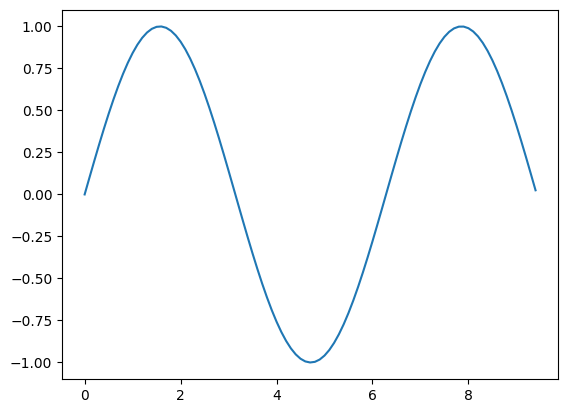

In [65]:
# Compute the x and y coordinates for points on a sine curve
x = np.arange(0, 3 * np.pi, 0.1)
y = np.sin(x)

# Plot the points using matplotlib
plt.plot(x, y)
plt.show()

一次绘制多条线，并增加标题、图例等

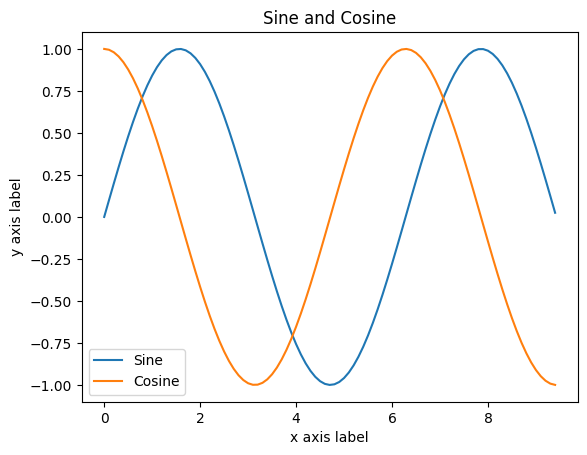

In [66]:
y_sin = np.sin(x)
y_cos = np.cos(x)

# Plot the points using matplotlib
plt.plot(x, y_sin)
plt.plot(x, y_cos)
plt.xlabel('x axis label')
plt.ylabel('y axis label')
plt.title('Sine and Cosine')
plt.legend(['Sine', 'Cosine'])
plt.show()

### Subplots 

可以使用 subplot 函数在同一张图中绘制不同的内容。以下是一个例子：

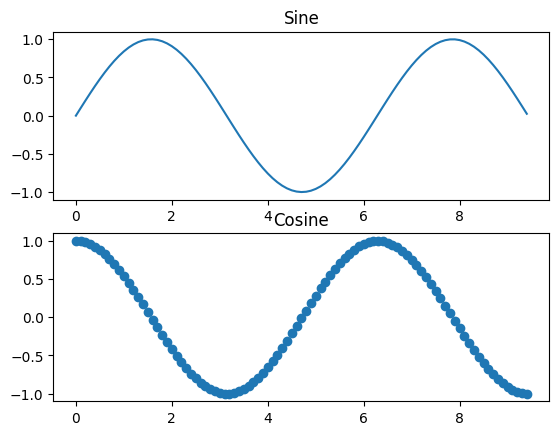

In [67]:
# Compute the x and y coordinates for points on sine and cosine curves
x = np.arange(0, 3 * np.pi, 0.1)
y_sin = np.sin(x)
y_cos = np.cos(x)

# Set up a subplot grid that has height 2 and width 1,
# and set the first such subplot as active.
plt.subplot(2, 1, 1)

# Make the first plot
plt.plot(x, y_sin)
plt.title('Sine')

# Set the second subplot as active, and make the second plot.
plt.subplot(2, 1, 2)
plt.scatter(x, y_cos)
plt.title('Cosine')

# Show the figure.
plt.show()

# OpenCV

OpenCV 是一个极受欢迎的计算机视觉库，用 C++ 构建，包含许多强大的 CV 工具。它允许您读取、写入和显示图像和视频、从网络摄像头流中读取数据、查找两幅图像之间的匹配关键点等等。

OpenCV 是用 C++ 编写的，但是有一个 Python 库使用这些优化的 C++ 库，并使用 numpy 数组公开 API！

开始import OpenCV...

In [68]:
import cv2

接下来将要处理图像和视频，可以直接从提供的data文件夹中获得，或用以下链接下载: https://drive.google.com/drive/folders/1wP7BLo6gKC13696GVjVdIK-aXcXpr4Ye?usp=share_link

## 图像基本操作

### 图像读取

可以使用`imread`函数从给定路径中读一张图

In [69]:
phoenix_image = cv2.imread("./data/phoenix.jpg")

# Careful, if it can't find your image, cv2.imread silently fails and returns None!
if phoenix_image is None:
  raise Exception("The image was not found! Check that you can see it on colab's file explorer by clicking the files icon.")

OpenCV 中的图像表示为 numpy 数组！

In [70]:
type(phoenix_image), phoenix_image.shape, phoenix_image.dtype

(numpy.ndarray, (1280, 720, 3), dtype('uint8'))

### 颜色通道、图像格式与数组化处理
彩色图的形状是(高, 宽, BGR通道) \
将高度放在第一位可能有些奇怪，这是因为 OpenCV 将图像视为图像的“行”和“列”。图像的“高度”就是行数！

注意：是BGR，不是RGB!


In [71]:
phoenix_image.shape

(1280, 720, 3)

可以看到每个像素用3个值表示 (uint8意味着值范围在0到255之间)

In [72]:
phoenix_image[0,0] # Get the pixel located at (0,0) from the top left

array([0, 0, 0], dtype=uint8)

彩色图像由“通道”组成 - 我们可以渲染的每种颜色都是红色、绿色和蓝色的某种组合（或者，在灰度图像的情况下是灰色）。

默认情况下，OpenCV 将彩色图像作为 BGR 打开，这意味着给定像素的值按“蓝色、绿色、红色”的顺序排列。

我们可以使用`cv2.cvtColor`函数来改变图像的颜色系统。


In [73]:
phoenix_image_rgb = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2RGB)

### 图像显示

如果您运行的是脚本 Python（不是 Jupyter notebook），则`imshow`命令将显示图像。但是，这在 jupyter notebook不起作用，因此我们将改用 Matplotlib 的`imshow`

In [74]:
# This line only works if you're running locally
# cv2.imshow('test', phoenix_image)

注意：Matplotlib默认图像是**RGB**格式，OpenCV默认图像是**BGR**格式。所以，我们在展示图像前需要先进行颜色通道变换。
让我们来写个imshow函数

In [75]:
def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
      # Height, width, channels
      # Assume BGR, do a conversion since 
      image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
      # Height, width - must be grayscale
      # convert to RGB, since matplotlib will plot in a weird colormap (instead of black = 0, white = 1)
      image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually an image
    plt.axis('off')
    # Make sure it outputs
    plt.show()

Let's show the image!

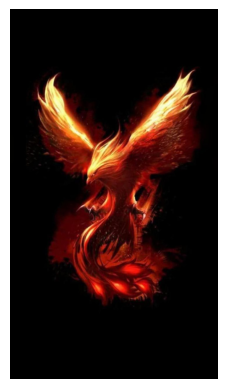

In [76]:
imshow(phoenix_image)

### 基础图像操作

#### 颜色空间转换

我们使用 `cvtColor` 函数将彩色图像转换维灰度图。灰度图像没有第三维，而是每个像素都有一个介于0到255之间的亮度值

Created BW image of shape (1280, 720)


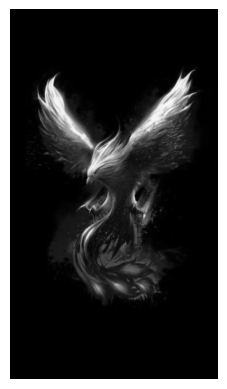

In [77]:
phoenix_gray = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)

print("Created BW image of shape",phoenix_gray.shape)
imshow(phoenix_gray)

二值化处理，`cv.threshold`传⼊参数分别为：图⽚（灰度）、阈值、超过阈值像素的设置值、阈值类型

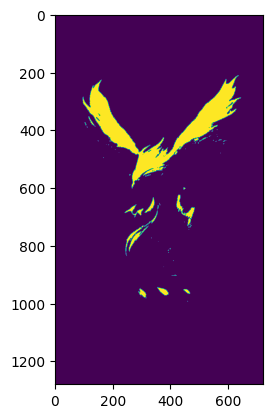

In [78]:
ret, bw_img = cv2.threshold(phoenix_gray, 100, 255, cv2.THRESH_BINARY)
plt.imshow(bw_img)

二值化的图像同样需要进行通道转换才能正确显示

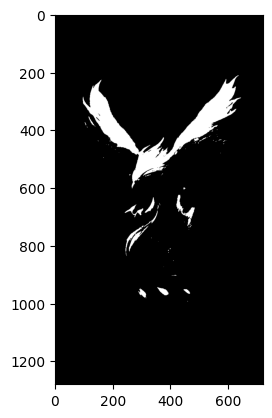

In [79]:
bw_cvt = cv2.cvtColor(bw_img, cv2.COLOR_BGR2RGB)
plt.imshow(bw_cvt)

任何数组上的操作都适用于图像。尝试将灰色的凤凰图像加在RGB中的蓝色和红色通道上，绿色通道上什么都不做（这个跟移除绿色通道是不同的）

Created image of shape (1280, 720, 3)


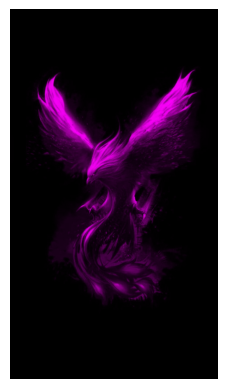

In [80]:
empty_arr = np.zeros(phoenix_gray.shape, dtype=np.uint8)

# Stack them, making the 3rd axis
magenta_phoenix = np.stack([ phoenix_gray, empty_arr, phoenix_gray, ], axis=2)
print("Created image of shape",magenta_phoenix.shape)
imshow(magenta_phoenix)

#### 图像尺寸调整

使用`resize`进行图像尺寸调整，需要给定输出的尺寸。注意这个图像尺寸size表示为（宽，高），不要与shape搞混了。

Resized to image of shape (2560, 2160, 3)


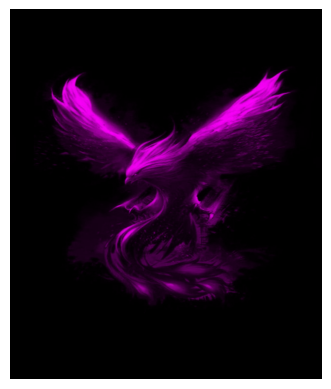

In [81]:
image_height, image_width, image_num_channels = magenta_phoenix.shape
new_height = image_height * 2
new_width = image_width * 3

# Resize it to 3x the width, and 2x the height, so we expect some distortion. 
# (To display it in the browser, the image is being scaled down anyway, so resizing it 2 x 2 will not be obvious)

bigger_magenta_phoenix = cv2.resize(magenta_phoenix, (new_width, new_height))
print("Resized to image of shape",bigger_magenta_phoenix.shape)
imshow(bigger_magenta_phoenix)

### 图像存储

使用 `imwrite` 函数可以进行图像存储

In [82]:
output_path = "./data/output_pinkphoenix.png"
cv2.imwrite(output_path, bigger_magenta_phoenix)

True

可以根据路径直接对刚存储的图像进行读取

Read file of shape: (2560, 2160, 3) type uint8


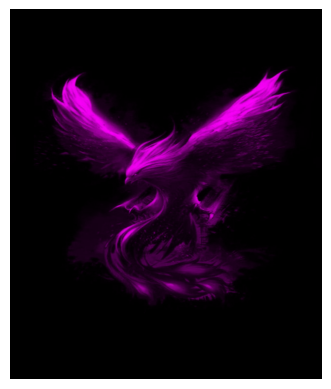

In [83]:
test_read_output = cv2.imread(output_path)
print("Read file of shape:",test_read_output.shape, "type",test_read_output.dtype)
imshow(test_read_output)

Everything works as expected!

### 视频处理

视频是一系列的图像，可以使用`VideoCapture`对象从网络摄像头、IP摄像头或者文件中读取视频。

可以使用 `VideoWriter`对象将视频写成一个文件。(本地运行的话，可以使用`cv2.imshow`来实时显示)

让我们来尝试裁剪视频！

In [84]:
# function to crop a given frame
def crop_frame(frame, crop_size):
  # We're given a frame, either gray or RGB, and a crop-size (w,h)
  crop_w, crop_h = crop_size
  # This is an array! We can slice it
  # Take the first pixels along the height, and along the width 
  cropped = frame[:crop_h, :crop_w]
  return cropped

capture = cv2.VideoCapture('./data/sample_video.mp4')

crop_size = (600,400) # w,h
output_path = './data/output_cropped.mp4'
# Use the MJPG format
output_format = cv2.VideoWriter_fourcc('M','P','4','V')
output_fps = 30
cropped_output = cv2.VideoWriter(output_path, output_format, output_fps, crop_size)
n = 0

while True:
  successful, next_frame = capture.read()
  if not successful:
    # No more frames to read
    print("Processed %d frames" % n)
    break
  # We have an input frame. Use our function to crop it.
  output_frame = crop_frame(next_frame, crop_size)
  # Write the output frame to the output video
  cropped_output.write(output_frame)
  n += 1
  # Now we have an image! We can process that as we would.

# We have to give up the file at the end.
capture.release()
cropped_output.release()

Processed 132 frames


### 视频播放

直接在Jupyter notebook中播放视频是比较麻烦的，不建议。

In [85]:
from IPython.display import Video
Video("./data/sample_video.mp4", embed=True)  # embed=True 表示直接嵌入Notebook

# Python部分的作业

### 第1题
完成名为 “is_prime” 的函数，传⼊参数类型为int。如果传⼊的参数是质数，则返回True，否则返回False。然后编写⼀个循环，并利⽤该函数，打印1到1000之间的所有质数，并统计质数的个数。

In [86]:
# 第1题
def is_prime(number):
    if number<2:
        return False
    
    for i in range(2, int(number**0.5)+1):
        if number%i==0:
            return False
    return True

count = 0
for num in range(1,200):
    if is_prime(num):
        print(num)
        count += 1
print(count)

2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
46


In [87]:
# 第1题
# 把pass替换为你自己的代码，完成is_prime函数：
def is_prime(number):
    for i in range(1,number):
        if i!=1 and number%i==0:
            return False
    return True

count = 0
for num in range(1,1001):
    if is_prime(num):
        print(num)
        count += 1
print(f"质数个数为{count}")



# 在下方编写代码，打印1到1000之间所有质数并统计质数个数：

1
2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73
79
83
89
97
101
103
107
109
113
127
131
137
139
149
151
157
163
167
173
179
181
191
193
197
199
211
223
227
229
233
239
241
251
257
263
269
271
277
281
283
293
307
311
313
317
331
337
347
349
353
359
367
373
379
383
389
397
401
409
419
421
431
433
439
443
449
457
461
463
467
479
487
491
499
503
509
521
523
541
547
557
563
569
571
577
587
593
599
601
607
613
617
619
631
641
643
647
653
659
661
673
677
683
691
701
709
719
727
733
739
743
751
757
761
769
773
787
797
809
811
821
823
827
829
839
853
857
859
863
877
881
883
887
907
911
919
929
937
941
947
953
967
971
977
983
991
997
质数个数为169


### 第2题
完成名为 “list_process” 的函数。该函数应传⼊⼀个由字符串组成的list，要求逐次打印（print）其中的每⼀个元素（字符串），且如果某个元素是数字，则该元素要连续打印三次；如果是其他情况，则该元素只打印⼀次，并且在其结尾处添加"#"。
例如，当输⼊的list为["AI","3","6","2","-1","lab1"]，则应依次打印出：
\
AI#
\
333
\
666
\
222
\
-1-1-1
\
lab1#

In [88]:
# 第2题
def list_process(mylist):
# option 1
#     for i in range(len(mylist)):
#         item = mylist[i]
# option 2
    for item in mylist:  
        try:
            int(item)
            print(item*3)
        except ValueError:
            print(item + '#')

test = ["ai","0308","1KiP","-1","Top","-E","0"]
list_process(test)

ai#
030803080308
1KiP#
-1-1-1
Top#
-E#
000


In [89]:
s="22"
print(int(s)%2)

0


In [90]:
# 第2题
# 把pass替换为你⾃⼰的代码，完成list_proces函数:
def list_process(mylist):
    for s in mylist:
        if s.isdigit():
            print(s+s+s)
        elif s.isdigit()==0 and s[0]=='-':
            if s[1:].isdigit():
                print(s+s+s)
            else:
                print(s+"#")   
        else:
            print(s+"#")    
 
# 完成后，运⾏下⾯的代码
test = ["ai","0308","1KiP","-1","Top","-E","0"]
list_process(test)

ai#
030803080308
1KiP#
-1-1-1
Top#
-E#
000


### 第3题
完成名为 “greatest_common_divisor” 的函数，它传⼊两个整数，并计算它们的最⼤公约数。


In [91]:
# 第3题
# 把pass替换为你⾃⼰的代码，完成greatest_common_divisor函数:
def greatest_common_divisor(num1, num2):
    limit = min(num1, num2)
    gcd = 1
    for i in range(1,num+1):
        if num1%i==0 and num2%i==0:
            gcd = i
    return gcd
            
# 完成后，运⾏下⾯的代码
x = 4840
y = 1600
print(x,"和",y,"的最⼤公约数是：")
print(greatest_common_divisor(x,y))

4840 和 1600 的最⼤公约数是：
40


In [92]:
# 第3题
# 把pass替换为你⾃⼰的代码，完成greatest_common_divisor函数:
# 欧几里得算法
def greatest_common_divisor(num1, num2):
    min=num2 if num1>num2 else num1
    result=1
    for i in range(2,min):
        if num1%i==0 and num2%i==0:
            result=i
    return result
    
# 完成后，运⾏下⾯的代码
x = 4840
y = 1600
print(x,"和",y,"的最⼤公约数是：")
print(greatest_common_divisor(x,y))

4840 和 1600 的最⼤公约数是：
40


In [93]:
# 第3题
# 把pass替换为你⾃⼰的代码，完成greatest_common_divisor函数:
def greatest_common_divisor(num1, num2):
    pass
 
# 完成后，运⾏下⾯的代码
x = 4840
y = 1600
print(x,"和",y,"的最⼤公约数是：")
print(greatest_common_divisor(x,y))

4840 和 1600 的最⼤公约数是：
None


### 第4题
完成名为“fibonacci”的函数，它传⼊⼀个整数n，并从1开始，依次打印出斐波纳契数列的前n个数。例如当n为5时，依此打印出1，1，2，3，5.

In [94]:
# 第4题
# 把pass替换为你⾃⼰的代码，完成fibonacci函数:
def fibonacci(n):
    a, b = 1, 1
    for _ in range(n):
        print(_,a) 
        a, b = b, a+b
# 完成后，运⾏下⾯的代码
fibonacci(13)

0 1
1 1
2 2
3 3
4 5
5 8
6 13
7 21
8 34
9 55
10 89
11 144
12 233


In [95]:
# 第4题
# 把pass替换为你⾃⼰的代码，完成fibonacci函数:
def fibonacci(n):
    a=1
    b=1
    for i in range(n):
        print(i,a) 
        a=b
        b=a+b
 
# 完成后，运⾏下⾯的代码
fibonacci(13)

0 1
1 1
2 2
3 4
4 8
5 16
6 32
7 64
8 128
9 256
10 512
11 1024
12 2048


### 第5题
完成名为 “mod_matrix” 的函数（替换掉“pass”），它输⼊两个矩阵X和Y。
如X和Y的维度相同，则进⾏以下操作：
1. 计算X与Y的点乘结果，并将其转置，得到矩阵A。
2. 计算X与Y的叉乘结果，得到矩阵B。
3. 将A和B相加，得到矩阵C。输出C中的众数(出现次数最多的元素)。

如果输⼊X和Y的维度不同，则输出0。

In [96]:
import numpy as np
# 第5题
# 把pass替换为你⾃⼰的代码，完成mod_matrix函数:
def mod_matrix(X,Y):
    X = np.array(X)
    Y = np.array(Y)
    
    if X.shape != Y.shape:
        return 0
    
    # 1. 计算 X 与 Y 的点乘（即元素级相乘），再将结果转置得到矩阵 A
#     A = np.transpose(X * Y)
    A = (X * Y).T
    
    # 2. 计算 X 与 Y 的叉乘（即矩阵乘法），得到矩阵 B
#     B = np.matmul(X, Y)
    B = X @ Y
    
    C = A + B
    
    unique_element, counts = np.unique(C, return_counts=True)
    out = unique_element[np.argmax(counts)]
    return out

# 完成后，运⾏下⾯的代码
X = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
Y = [[9, 8, 7], [6, 5, 4],[3, 2, 1]]
print(mod_matrix(X,Y))

39


In [97]:
import numpy as np
# 第5题
# 把pass替换为你⾃⼰的代码，完成mod_matrix函数:
def mod_matrix(X,Y):
    X=np.array(X)
    Y=np.array(Y)
    if X.shape!=Y.shape:
        return 0
    A=np.multiply(X, Y).T
    B=np.dot(X,Y)
    C=A+B
    lst=[]
    for i in range(len(C)):
        temp=list(C[i])
        lst=lst+temp
    temp=list(set(lst))
    result={}
    for i in temp:
        result[i]=0
    keys=list(result.keys())
    for i in keys:
        count=0
        for j in lst:
            if j==i:
                count+=1
        result[i]=count
    end=keys[0]
    for i in keys:
        if result[i]>result[end]:
            end=i
    return end
# 完成后，运⾏下⾯的代码
X = [[1, 2, 3],[4, 5, 6],[7, 8, 9]]
Y = [[9, 8, 7],[6, 5, 4],[3, 2, 1]]
print(mod_matrix(X,Y))

39


### 第6题
**给学生评分**

ai362班有 `num_students` 名学生，每位学生有 `num_grades` 成绩，每个任务对应一个成绩。 
成绩存储格式为numpy ndarray，形状为 `(num_students, num_grades)`. (每行为一个学生，每列为一个任务)

**(a)** 创建一个形状合适的ndarray来保存成绩表，并用值`[0, num_students * num_grades)`从左到右，从上到下进行填充

**(b)** 学生张三的索引是`2`, 使用ndarray切片来获取包含他所有成绩的数组

**(c)** 学生李四想知道任务PSet 4（任务索引4）是否太难，使用ndarray切片提取整个班在任务4上的成绩

In [98]:
num_students = 4
num_assignments = 5

# Write your solution below.
all_grades = np.array(range(num_students*num_assignments)).reshape(num_students,num_assignments)
print("(a) All grades:\n", all_grades, '\n')

zhangsan_grades = all_grades[2]
print("(b) zhangsan's grades:", zhangsan_grades)

pset4_grades = all_grades[:,4]
print("(c) pset4 grades:", pset4_grades)

(a) All grades:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]] 

(b) zhangsan's grades: [10 11 12 13 14]
(c) pset4 grades: [ 4  9 14 19]


In [99]:
import numpy as np
num_students = 4
num_assignments = 5

# 将你自己的代码编写在下面：
lst=[]
for i in range(num_students*num_assignments):
    lst.append(i)
all_grades = np.array(lst).reshape(num_students,num_assignments)
print("(a) All grades:\n", all_grades, '\n')

zhangsan_grades = all_grades[2]
print("(b) zhangsan's grades:", zhangsan_grades)

pset4_grades = all_grades[:,4]
print("(c) pset4 grades:", pset4_grades)

(a) All grades:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]] 

(b) zhangsan's grades: [10 11 12 13 14]
(c) pset4 grades: [ 4  9 14 19]


# 图像部分的作业


### 第1题
**姿态估计**

我们提出了一个全新的姿态估计网络，该网络的输出是形状为 `(num_keypoints, 3)` 的矩阵（每行代表身体上的一个关键特征点，列分别是x，y，z坐标值）。两个关键点之间的连接定义为关节"joint" ，表达的矩阵形状为`(num_joints, 2)`（每行是一个joint，列分别是开始关键点索引START_KEYPOINT_INDEX和结束关键点索引END_KEYPOINT_INDEX）

**(a)** 创建一个关节起点矩阵和另一个关节终点矩阵，每个矩阵的形状为 `(num_joints, 3)`。起点表应包含每个关节起点的位置（根据 `position`）

**(b)** 创建一个关节位移矩阵，形状为 `(num_joints, 3)`。每行代表一个关节。列应分别为关节起点和关节终点之间的 X、Y 和 Z 差值 `(endX - startX, endY - startY, endZ-startZ)`

**(c)** 找到每个位移矢量的大小（长度），并将结果输出到长度为 `num_joints` 的数组中。记住幂运算符是 `**`

In [100]:
import numpy as np
num_keypoints = 7
num_joints = 5


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0], #Head
        [0, 0, 0], #Torso
        [1, 0, 0], #Right Arm
        [-1, 0, 0], #Left Arm
        [0, -1, 0], #Lower ,Torso
        [1, -2, 0], #Right Leg
        [-1, -2, 0] #Left Leg
    ]
)

#   O
#  _|_
#   |
#  /\
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [1, 3],
    # Torso to Lower Torso
    [3, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [4, 6]
])


#将你自己的代码编写在下面：
# (a)
starts = keypoint_positions[joints[:, 0]]
ends = keypoint_positions[joints[:, 1]]

# (b)
diffs = ends - starts

# (c)
lengths = np.sum(diffs ** 2, axis = 1) ** 0.5 #主要注意在哪个维度进行sum
lengths

array([1.        , 1.        , 1.        , 1.41421356, 1.41421356,
       1.41421356])

In [101]:
import numpy as np
num_keypoints = 7
num_joints = 5


# All Z's in one plane, but makes it easier to see XYZ vs Start/end
keypoint_positions = np.array(
    [
        [0, 1, 0], #Head
        [0, 0, 0], #Torso
        [1, 0, 0], #Right Arm
        [-1, 0, 0], #Left Arm
        [0, -1, 0], #Lower ,Torso
        [1, -2, 0], #Right Leg
        [-1, -2, 0] #Left Leg
    ]
)

#   O
#  _|_
#   |
#  /\
joints = np.array([
    # Head to torso
    [0, 1],
    # Torso to Right arm
    [1, 2],
    # Torso to Left Arm
    [1, 3],
    # Torso to Lower Torso
    [3, 4],
    # Lower Torso to Right Leg
    [4, 5],
    # Lower Torso to Left Leg
    [4, 6]
])

#将你自己的代码编写在下面：
# (a)
lst1=[]
for i in range(joints.shape[0]):
    a=joints[i][0]
    lst1.append(a)
# print(lst1)
start=[]
for i in lst1:
    start.append(keypoint_positions[i])
start=np.array(start)
print("start等于：")
print(start)

lst2=[]
for i in range(joints.shape[0]):
    a=joints[i][1]
    lst2.append(a)
# print(lst2)
end=[]
for i in lst2:
    end.append(keypoint_positions[i])
end=np.array(end)
print("end等于：")
print(end)

# (b)
delta = end - start
print(delta)
# print(delta[0])
# (c)
lens=[]
lens=list(map(float,lens))
for i in range(delta.shape[0]):
    temp=list(delta[i])
    l=0
    for j in temp:
        l+=j**2
    l=l**(1/2)
    lens.append(l)
print(lens)

start等于：
[[ 0  1  0]
 [ 0  0  0]
 [ 0  0  0]
 [-1  0  0]
 [ 0 -1  0]
 [ 0 -1  0]]
end等于：
[[ 0  0  0]
 [ 1  0  0]
 [-1  0  0]
 [ 0 -1  0]
 [ 1 -2  0]
 [-1 -2  0]]
[[ 0 -1  0]
 [ 1  0  0]
 [-1  0  0]
 [ 1 -1  0]
 [ 1 -1  0]
 [-1 -1  0]]
[1.0, 1.0, 1.0, 1.4142135623730951, 1.4142135623730951, 1.4142135623730951]


### 第2题
**边缘检测** 如果想要画以上练习中的凤凰图，知道边缘可能会有很大帮助！

**(a)** 读取图像 `phoenix.jpg`，转换为灰度图 \
**(b)** 使用 scipy.signal.convolve2d（别名为`conv2d`）计算 phoenix 和 `kernel`的卷积（确保先将其图像转换为 0 到 1 之间的 float32）。使用 imshow 显示结果。使用 `prep_to_draw` 将 [0,1] BW 图像转换为可绘制图像。

Black and white image


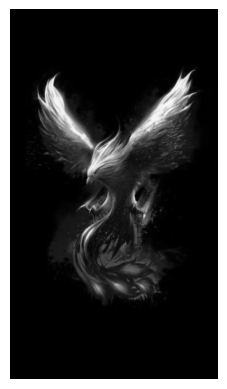

Edges


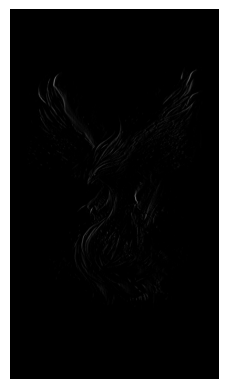

Box-blurred


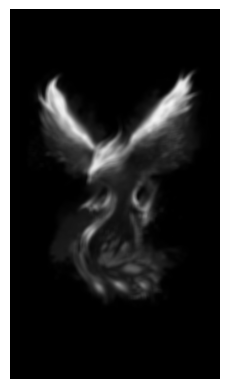

Sharpen of blurred img


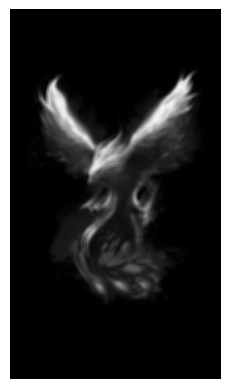

In [102]:
import scipy
import scipy.signal

conv2d = scipy.signal.convolve2d # assigning a shorter name for this function.

# looks for horizontal edges
horizontal_edge_detector = np.array(
  [
      [-1, 0, 1]
  ]
)

box_blur_size = 15
box_blur = np.ones((box_blur_size, box_blur_size)) / (box_blur_size ** 2)
sharpen_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0,  -1, 0]
    ]
)

all_edge_detector = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0,  -1, 0]
    ]
)

def prep_to_draw(img):
  """ Function which takes in an image and processes it to display it.
  """
  # Scale to 0,255
  prepped = img * 255
  # Clamp to [0, 255]
  prepped = np.clip(prepped, 0, 255) # clips values < 0 to 0 and > 255 to 255.
  prepped = prepped.astype(np.uint8)
  return prepped

'''
SOLUTION:
'''

phoenix_image = cv2.imread("./data/phoenix.jpg")
bw = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)
bw_norm = (bw / 255.0).astype(np.float32)

edges = conv2d(bw_norm, horizontal_edge_detector)
blurred = conv2d(bw_norm, box_blur)
sharpened = conv2d(blurred, sharpen_kernel)

# Apply a second time for greater effect
sharpened = conv2d(sharpened, sharpen_kernel)
# Feel free to try convolving with other kernels! I've added a few I like to the top.
print("Black and white image")
imshow(prep_to_draw(bw_norm))
print("Edges")
imshow(prep_to_draw(edges))
print("Box-blurred")
imshow(prep_to_draw(blurred))
print("Sharpen of blurred img")
imshow(prep_to_draw(sharpened))



(1280, 720, 3)


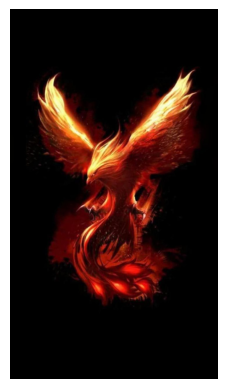

灰度图如下：


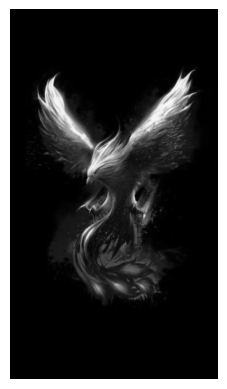

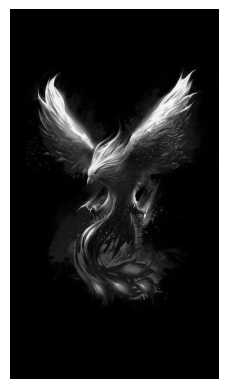

In [103]:
import scipy
import scipy.signal
import cv2
import numpy as np
import matplotlib.pyplot as plt

conv2d = scipy.signal.convolve2d # assigning a shorter name for this function.

# looks for horizontal edges
horizontal_edge_detector = np.array(
  [
      [-1, 0, 1]
  ]
)

box_blur_size = 15
box_blur = np.ones((box_blur_size, box_blur_size)) / (box_blur_size ** 2)
sharpen_kernel = np.array(
    [
        [0, -1, 0],
        [-1, 5, -1],
        [0,  -1, 0]
    ]
)

all_edge_detector = np.array(
    [
        [0, -1, 0],
        [-1, 4, -1],
        [0,  -1, 0]
    ]
)

def prep_to_draw(img):
  """ Function which takes in an image and processes it to display it.
  """
  # Scale to 0,255
  prepped = img * 255
  # Clamp to [0, 255]
  prepped = np.clip(prepped, 0, 255) # clips values < 0 to 0 and > 255 to 255.
  prepped = prepped.astype(np.uint8)
  return prepped

#将你自己的代码编写在下面：
phoenix_image = cv2.imread("./data/phoenix.jpg")
print(phoenix_image.shape)
phoenix_image_rgb = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2RGB)

phoenix_gray = cv2.cvtColor(phoenix_image, cv2.COLOR_BGR2GRAY)
phoenix_gray=(phoenix_gray / 255.0).astype(np.float32)

def imshow(image, *args, **kwargs):
    if len(image.shape) == 3:
    # Height, width, channels
    # Assume BGR, do a conversion since 
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    else:
    # Height, width - must be grayscale
    # convert to RGB, since matplotlib will plot in a weird colormap (instead of black 
        image = cv2.cvtColor(image, cv2.COLOR_GRAY2RGB)
    # Draw the image
    plt.imshow(image, *args, **kwargs)
    # We'll also disable drawing the axes and tick marks in the plot, since it's actually
    plt.axis('off')
    # Make sure it outputs
    plt.show()

imshow(phoenix_image)

print("灰度图如下：")
imshow(prep_to_draw(phoenix_gray))

result=conv2d(phoenix_gray,sharpen_kernel)
imshow(prep_to_draw(result))


## 提交方式
完全所有Cell的运⾏后，保存为ipynb和PDF格式（保留所有输出）。将导出的ipynb命名为“Lab1+姓名+学号.ipynb”，将导出的PDF命名为“Lab1+姓名+学号.pdf”，PDF格式⽂件可以从⻚⾯左上⻆的“File/⽂件”菜单⾥选择通过HTML或LaTeX导出，也可以通过打印预览，保存为PDF。 请独⽴完成练习，参考答案将在截⽌时间后择日公布。 截⽌时间：2025年3月4日23:59